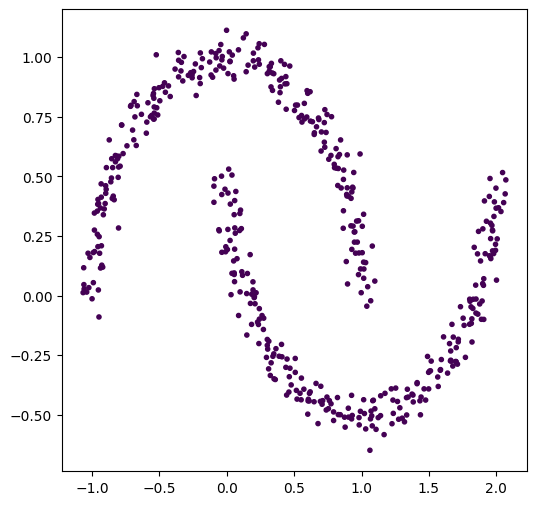

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(0)

n_samples = 500

###########################################################
X, labels_true = datasets.make_blobs(n_samples=n_samples, random_state=8)

##########################################################
# Generate sample data
# np.random.seed(0)
# t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
# x = t * np.cos(t)
# y = t * np.sin(t)
# X = np.concatenate((x, y))
# X += 0.7 * np.random.randn(2, n_samples)
# X = np.array(X.T)
# labels_true = np.ones(n_samples)

###########################################################
# X = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
# labels_true = np.ones(n_samples)

###########################################################
X = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
labels_true = np.ones(n_samples)


plt.scatter(X[:,0], X[:,1], c=labels_true, marker=".")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

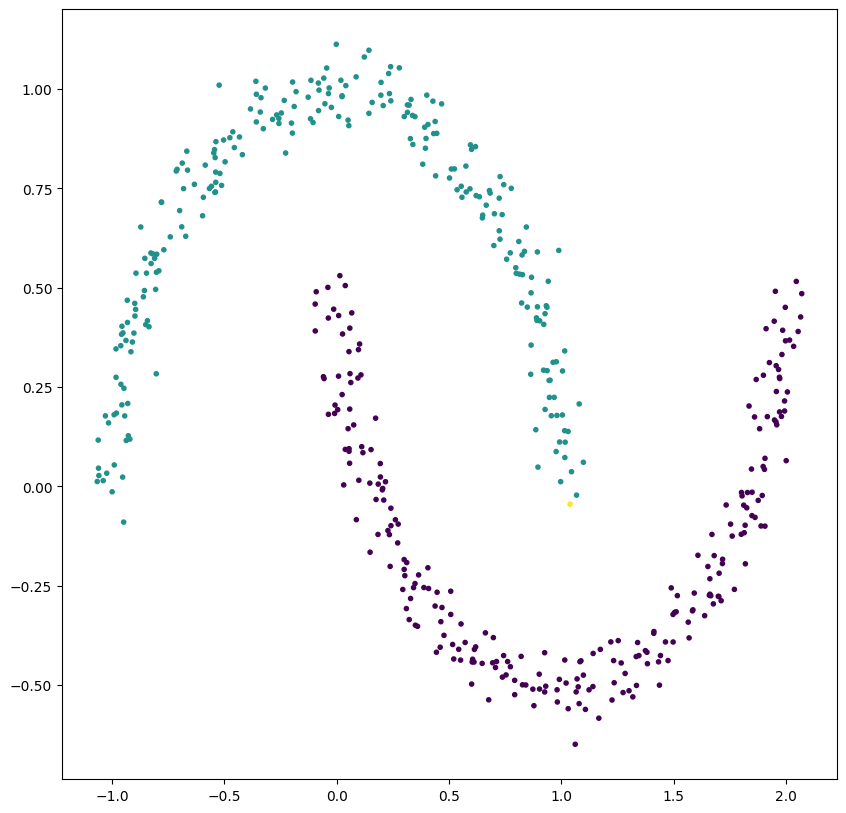

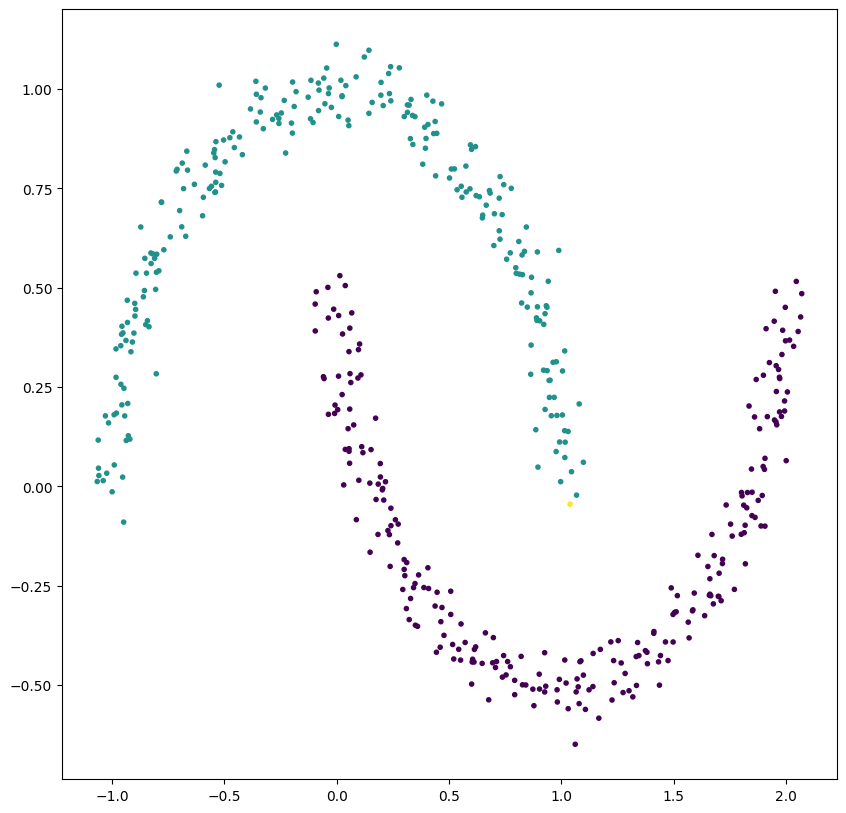

In [6]:
import random
from scipy.spatial import distance
from IPython.display import display, clear_output

## Parameters
min_samples = 2
eps = 0.2 #3 or 0.2

# meta data from the dataset
n_features = X.shape[1]
cluster_num = -1

# remaining list of samples to visit
remaining = dict()
# list of clustered samples
clustered = dict()
# index of all visited samples
visited = []
# tuple with index and actual samples to visit. those might be core or border points
queue = []

# include all samples into remaining points to visit
for i in np.arange(X.shape[0]):
    remaining[i] = X[i]

# print(X.shape)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
plt.rcParams['figure.figsize'] = [6, 6]

for i in np.arange(500):
    
    ##################################################################################
    # if empty queue, which might indicate the ending of a cluster, one needs to pic a remaining sample at random
    if len(queue) == 0:
        # choose random sample
        rand_idx = list(remaining.keys())[random.randint(0,len(remaining)-1)]
        current_sample = remaining[rand_idx]
        
        # new cluster label
        cluster_num += 1
    
    ##################################################################################
    else:
        # next sample in queue
        temp = queue.pop(0)
        rand_idx = temp[0]
        current_sample = temp[1]

    # calculate all sample distances towards the current sample
    # n,2 matrix, where the first column is the sample index, and the second is the distance to current_sample
    distance_vals = np.array([[int(i), distance.euclidean(current_sample, X[i])] for i in np.arange(X.shape[0])])

    # filter sample according to eps - validation of the first algorithm parameter
    filtered_distances = distance_vals[np.where(distance_vals[:,1] < eps), :][0]

    # sort by distance
    sorted_distances = filtered_distances[filtered_distances[:,1].argsort()]
    
    # validation of the first algorithm parameter
    if sorted_distances.shape[0] > min_samples:
        if len(queue) == 0:
            clustered[rand_idx] = cluster_num
        indexes = sorted_distances[:,0].astype(int)
            
        #Add to queue and remove new samples
        for idx in indexes:
            clustered[idx] = cluster_num
            ############################
            # verify if new neighbor samples are already in queue
            pres = False
            for q in queue:
                if q[0] == idx:
                    pres = True
                    break
            if not pres and idx != rand_idx and idx not in visited:
                queue.append((idx,X[idx]))
                remaining.pop(idx, None)        
    
    # update visited points
    visited.append(rand_idx)

    print("remaining:" , len(remaining))
    print("in queue:" , len(queue))
    labels = np.array([-1]*n_samples)
    
    indexes = list(clustered.keys())
    labels[indexes] = list(clustered.values())
    labels[rand_idx] = 2

    ax.cla()
    ax.scatter(X[:,0], X[:,1], c=labels, marker=".")
    
    clear_output(wait = True)
    display(fig)
#     plt.pause(0.1)